In [1]:
# Membuat pengecekan tensorflow
from packaging import version
import tensorflow as tf

# Memeriksa versi TensorFlow
assert version.parse(tf.__version__) >= version.parse('2.0')
print(f"Versi TensorFlow: {tf.__version__}")

# Memeriksa keberadaan GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU Terdeteksi")
    for gpu in gpus:
        print(f"   {gpu.name}")
else:
    print("Tidak Ada GPU Terdeteksi")


Versi TensorFlow: 2.13.1
Tidak Ada GPU Terdeteksi


# Import Libraries

In [2]:
# Arsitektur CNN
from tensorflow.keras import layers, models, callbacks

# Generator dan Praproses Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Fungsi Loss
from keras.metrics import sparse_categorical_crossentropy

# Visualisasi
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Pengaturan Direktori
import os

# Log
import pandas as pd

# Pra-pelatihan

In [3]:
# Membuat nama kelas berdasarkan urutan folder
class_names = [ 'ain', 'alif', 'ba', 'dal', 'dhod', 'dzal',
                'dzho', 'fa', 'ghoin', 'ha', 'ha\'', 'hamzah', 'jim',
                'kaf', 'kho', 'lam', 'lamalif', 'mim', 'nun', 'qof',
                'ro', 'shod', 'sin', 'syin', 'ta', 'tho', 'tsa', 
                'wawu', 'ya', 'zain']

## Arsitektur CNN

![arsitektur](arsitektur_baru.png)

In [4]:
# Membuat arsitektur CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(256, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))

# Melihat detail arsitektur
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Dataset | Praproses dan Augmentasi

In [5]:
# Pengaturan direktori
PATH = 'dataset'
VAL_DATA = 'validasi'
TOTAL_TRAIN_DATA = 1680
TRAIN_DIR = os.path.join(PATH, 'train')
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)

# Membuat generator pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Membuat generator validasi
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
)


validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
)

# Menyimpan gambar augmentasi
i = 0
for batch in train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb',
    save_to_dir='augmented',
    save_prefix='aug',
    save_format='jpg'):
    
    i += 1
    if i > 0:
        break

Found 1680 images belonging to 30 classes.
Found 420 images belonging to 30 classes.
Found 1680 images belonging to 30 classes.


![Augmentasi Data](augmentasi.png)

## Pelatihan

In [6]:
# Callback untuk menyimpan model setiap epoch
model_save_callback = callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}_{accuracy:.3f}.h5', save_best_only=False, save_weights_only=False, monitor='val_accuracy')

# Inisialisasi metrik
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan!
history = model.fit( train_generator,
                     steps_per_epoch=train_generator.n // train_generator.batch_size,
                     epochs=105, 
                     validation_data=validation_generator,
                     validation_steps= validation_generator.n // validation_generator.batch_size,
                     callbacks=[
                         model_save_callback
                     ]
                   ) 

Epoch 1/105
30/30 [==============================] - ETA: 0s - loss: 3.3899 - accuracy: 0.0315

C:\Users\salma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 79s 3s/step - loss: 3.3899 - accuracy: 0.0315 - val_loss: 3.1354 - val_accuracy: 0.0663
Epoch 2/105
30/30 [==============================] - 85s 3s/step - loss: 3.2319 - accuracy: 0.0815 - val_loss: 2.8776 - val_accuracy: 0.1709
Epoch 3/105
30/30 [==============================] - 77s 3s/step - loss: 3.0877 - accuracy: 0.1208 - val_loss: 2.5809 - val_accuracy: 0.2423
Epoch 4/105
30/30 [==============================] - 75s 2s/step - loss: 2.8953 - accuracy: 0.1482 - val_loss: 2.6015 - val_accuracy: 0.2449
Epoch 5/105
30/30 [==============================] - 76s 3s/step - loss: 2.7038 - accuracy: 0.1899 - val_loss: 2.2299 - val_accuracy: 0.2679
Epoch 6/105
30/30 [==============================] - 76s 3s/step - loss: 2.5916 - accuracy: 0.1940 - val_loss: 2.0999 - val_accuracy: 0.2704
Epoch 7/105
30/30 [==============================] - 77s 3s/step - loss: 2.4481 - accuracy: 0.2268 - val_loss: 1.9078 - val_accuracy: 0.3138
Epoch 8/105
30/30 [======

## Visualisasi metrik

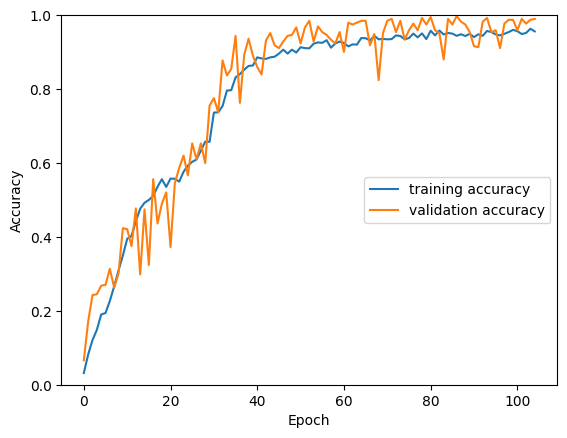

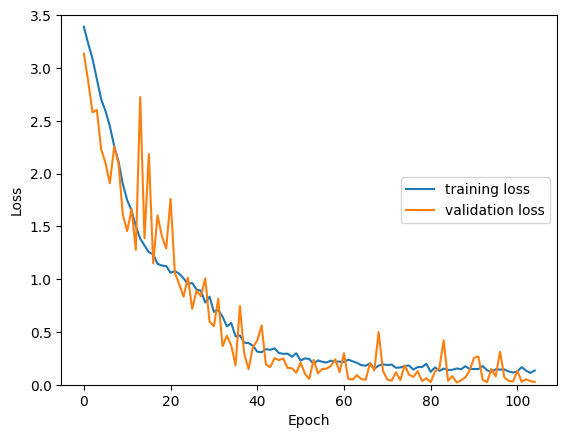

In [7]:
# Menyimpan history pelatihan
pd.DataFrame(history.history).to_csv('history.csv')

# Memvisualisasikan metrik akurasi selama pelatihan 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1]) 
plt.legend(loc='right')
plt.savefig('train_val_acc_augmentation.png')
plt.show()

# Memvisualisasikan metrik loss selama pelatihan
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0., 3.5])
plt.legend(loc='right')
plt.savefig('train_val_loss_augmentation.png')
plt.show()

# Evaluasi Model 

In [11]:
# load model terbaik
loaded_model = models.load_model('models/fixmodel.h5')

In [12]:
# Membuat fungsi load image untuk pengujian
def load_image(img_path):
  # Praproses data uji
  img = load_img(img_path, target_size=(150,150,3))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.0

  return img_tensor

In [14]:
# Membuat generator seperti sebelum pelatihan untuk data uji
PATH = 'dataset'
VAL_DATA = 'validasi'
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)


validation_datagen = ImageDataGenerator( rescale = 1./255 )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                    )

Found 420 images belonging to 30 classes.


## Pengujian manual

Nama huruf:  ha'


1/1 [==============================] - 0s 247ms/step
10


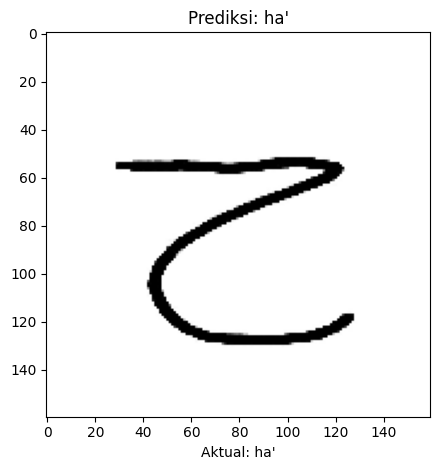

[[3.7640717e-02 3.7883261e-15 5.4783811e-07 7.9480685e-08 3.6754845e-08
  2.2143938e-08 2.7312499e-10 1.6370924e-11 1.2677605e-04 1.2579929e-06
  9.9724663e+01 1.5584205e-06 4.7804330e-02 8.1907831e-12 1.8871203e-01
  3.5859344e-08 4.5172123e-06 1.7193809e-06 3.1537457e-13 1.1218522e-10
  1.0119605e-09 1.3757021e-05 1.7138353e-05 1.6846878e-10 1.4377317e-09
  2.6715911e-06 3.7174047e-16 2.8236979e-08 1.0270128e-03 5.7591318e-13]]


In [15]:
# load data uji
huruf = input("Nama huruf: ")
img_path = 'dataset/' + VAL_DATA + '/' + huruf + '/'+ huruf + '_5.jpg'
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()
print(pred)

In [16]:
# Pengujian GUI

from ipywidgets import *
from IPython.display import clear_output, display
from tkinter import Tk, filedialog

def select_files(file):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    file.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(file.files) # Print the list of files selected.

In [18]:
fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

Button(description='File select', style=ButtonStyle())

1/1 [==============================] - 0s 69ms/step
26


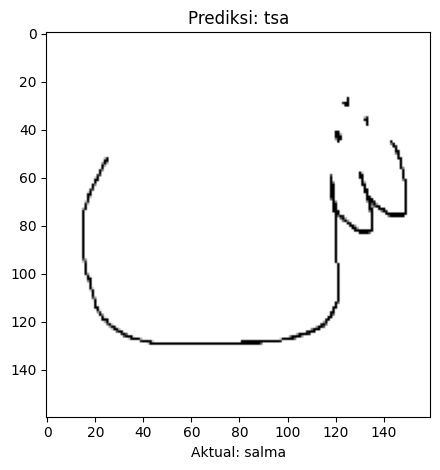

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.33916300e-26 7.45029310e-36 2.61844356e-28 1.15908919e-29
  1.22240868e-28 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00696094e-22 0.00000000e+00 1.73743684e-31 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.10921604e-30 8.23270329e-06
  0.00000000e+00 0.00000000e+00 4.57527748e-34 2.34130840e+01
  6.37947565e-15 0.00000000e+00 7.65868988e+01 0.00000000e+00
  1.44122120e-31 2.95371106e-23]]


In [19]:
# Don't run this cell if the cell above hadn't run yet

files = fileselect.files
img_path = files[0]
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()
print(pred)

In [20]:
# Menghitung akurasi secara manual
total = 0
betul = 0
for folder in class_names:
    for count, filename in enumerate(os.listdir(os.path.join(VALIDATION_DIR, folder))):
        img_path = 'dataset/' + VAL_DATA + '/' + folder + '/'+ filename
        new_image = load_image(img_path)
        pred = loaded_model.predict(new_image)
        if class_names[np.argmax(pred)] == folder:
            betul += 1
        total += 1

print("Akurasi pada data tes: {}%".format((betul/total)*100))

1/1 [==============================] - 0s 53ms/step
Akurasi pada data tes: 99.52380952380952%


## Confusion Matrix

In [21]:
# Confusion Matrix dan Classification Report
Y_pred = []

for folder in class_names:
    for labels, filename in enumerate(os.listdir(os.path.join(VALIDATION_DIR, folder))):
        img_path = 'dataset/' + VAL_DATA + '/' + folder + '/'+ filename
        new_image = load_image(img_path)
        pred = loaded_model.predict(new_image)
        Y_pred.append(np.argmax(pred, axis=1))

1/1 [==============================] - 0s 47ms/step


In [23]:
# Menampilkan hasil
print('\n=======================Confusion Matrix=======================\n')
print(confusion_matrix(validation_generator.classes, Y_pred))
print('\n\n=================Classification Report=================\n')
target_names = class_names
print(classification_report(validation_generator.classes, Y_pred, target_names=target_names))


=======================Confusion Matrix=======================

[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  